## Reward Curves for fedML




In [7]:
import numpy as np
import pandas as pd

# Hypothetical scenario assumptions
# Assumed base emission for the network, which is a pool of available tokens to be distributed monthly
base_emission = 100000  # M
# Assumed network utilization rate, which reflects the proportion of nodes that are actively participating
utilization_rate = 0.75  # U, 75% of nodes are active
# Assumed individual node stake relative to the total network stake (hypothetical)
node_stake_ratio = 0.01  # S, 1% of the total stake in the network
# Assumed individual node reputation score, NOTE THAT WE NORMALIZE HERE, WILL MAKE MORE SENSE LATER
node_reputation_score = 0.85  # R, normalized between 0 and 1


# (days active in month/total days per month) * ((your per node contribution to total revenue/your active deployment nodes) * (total revenue/nodes in those deployments))
# og formula for a node's earnings
def calculate_node_earnings(M, U, S, R):
    return (M * (1 - U) * S) + (M * U * R)

# Calculate node earnings with the provided hypothetical scenario
node_earnings_original = calculate_node_earnings(base_emission, utilization_rate, node_stake_ratio, node_reputation_score)



In [11]:
# v1 vs v2 comparison with varying parameters

# Define a range of utilization rates, node stake ratios and reputation scores to analyze
# this helps us understand how nodes respond to different levels of activity, stake, and reputation
utilization_rates = np.array([0.25, 0.50, 0.75, 1.00])  # Different levels of network activity
node_stake_ratios = np.array([0.01, 0.05, 0.10, 0.20])  # From low to very high stake
node_reputation_scores = np.array([0.1, 0.5, 0.85, 1.0])  # From very low to perfect reputation

# calculate node earnings for each combination of utilization rate, stake ratio, and reputation score
earnings_data = []
for u in utilization_rates:
    for s in node_stake_ratios:
        for r in node_reputation_scores:
            original_earnings = calculate_node_earnings(base_emission, u, s, r)
            earnings_data.append({
                'Utilization Rate': u,
                'Stake Ratio': s,
                'Reputation Score': r,
                'Original Earnings': original_earnings,
            })

# covert to df for better visualization
earnings_df = pd.DataFrame(earnings_data)

earnings_df.sort_values(by=['Utilization Rate', 'Stake Ratio', 'Reputation Score'], inplace=True)
earnings_df.reset_index(drop=True, inplace=True)

earnings_df.head(50)

,Utilization Rate,Stake Ratio,Reputation Score,Original Earnings
0,0.25,0.01,0.10,3250.0
1,0.25,0.01,0.50,13250.0
2,0.25,0.01,0.85,22000.0
3,0.25,0.01,1.00,25750.0
4,0.25,0.05,0.10,6250.0
5,0.25,0.05,0.50,16250.0
6,0.25,0.05,0.85,25000.0
7,0.25,0.05,1.00,28750.0
8,0.25,0.10,0.10,10000.0
9,0.25,0.10,0.50,20000.0


## Reward Curve v3

### Reputation Score

# R = (days of month deployed/total days of month) + ∑(contributed revenue / num of nodes in deployment)


In [21]:

import numpy as np
import pandas as pd

# hypothetical scenario assumptions
base_emission = 100000  # M
utilization_rate = 0.75  # U, 75% of nodes are active
node_stake_ratio = 0.01  # S, 1% of the total stake in the network

# calculation for reputation score
def calculate_reputation_score(days_deployed, total_days_in_month, contributed_revenues, num_nodes):
  """
  Calc reputation score for a single node

  params:
  """
  active_ratio = days_deployed / total_days_in_month
  revenue_score = np.sum(np.array(contributed_revenues) / np.array(num_nodes))
  return active_ratio * revenue_score



# calculation for node earnings
def calculate_node_earnings(M, U, S, R):
    return (M * (1 - U) * S) + (M * U * R)


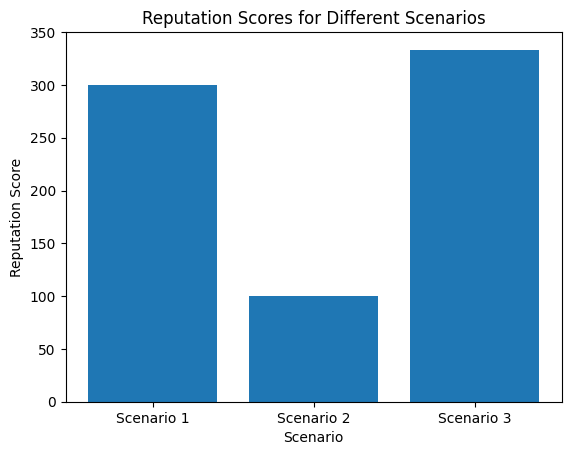

{'Scenario 1': 300.0, 'Scenario 2': 100.0, 'Scenario 3': 333.33333333333337}

In [22]:
import matplotlib.pyplot as plt
total_days_in_month = 30


scenarios = {
    'Scenario 1': {
        'days_deployed': 30,
        'contributed_revenues': [1000, 1500, 2000],
        'num_nodes': [10, 15, 20]
    },
    'Scenario 2': {
        'days_deployed': 15,
        'contributed_revenues': [800, 1200],
        'num_nodes': [8, 12]
    },
    'Scenario 3': {
        'days_deployed': 25,
        'contributed_revenues': [500, 700, 900, 100],
        'num_nodes': [5, 7, 9, 1]
    }
}

results = {}
for name, params in scenarios.items():
    r_score = calculate_reputation_score(
        params['days_deployed'],
        total_days_in_month,
        params['contributed_revenues'],
        params['num_nodes']
    )
    results[name] = r_score

labels, scores = zip(*results.items())
plt.bar(labels, scores)
plt.xlabel('Scenario')
plt.ylabel('Reputation Score')
plt.title('Reputation Scores for Different Scenarios')
plt.show()

results